In [2]:
# import pandas as pd
# # import matplotlib.pyplot as plt
# # import seaborn as sns
# # import numpy as np

# # tips=pd.read_csv('tips.csv')
# #Model : simple linear regrission

In [4]:
import sys
print(sys.executable)

!{sys.executable} -m pip install --upgrade pip
!{sys.executable} -m pip install pandas numpy




C:\Users\arthi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [1]:
import sys
print("Python used by this notebook:")
print(sys.executable)

!{sys.executable} -m pip install --upgrade pip
!{sys.executable} -m pip install pandas numpy matplotlib seaborn


Python used by this notebook:
C:\Users\arthi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [1]:
import sys
print(sys.executable)

!{sys.executable} -m pip install --upgrade pip
!{sys.executable} -m pip install scikit-learn

C:\Users\arthi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print(pd.__version__)
print(np.__version__)



2.3.3
2.3.5


In [6]:
df=sns.load_dataset("tips")
df.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


2.Understanding the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


total_bill ------> X i/p

tip ------> Y o/p

3.Stats Summary

In [8]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


4.Relationship check
Before using any model,we must confirm relationship...?

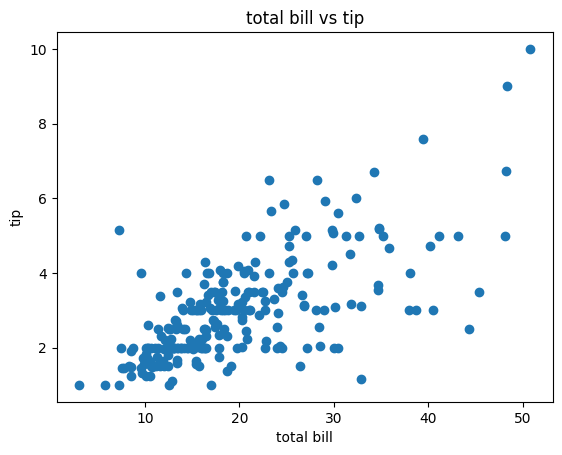

In [9]:
plt.scatter(df["total_bill"],df["tip"])
plt.xlabel("total bill")
plt.ylabel("tip")
plt.title("total bill vs tip")
plt.show()

Observations:
1.As the bill increases, tip increases
2.Relationship=Straight line(we use linear regression)

4.Feature & target separation

In [10]:
x=df[["total_bill"]]
# Feature i/p 2d only(imp)
y=df["tip"]   
# Feature o/p 1d

C:\Users\arthi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


5.Train-test-split  why...?
A model must perform well on unseen data

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
# 80% ---->training
# 20% ---->testing


6.Feature Standardization
why...? 
1.compare the co-efficients fairly
2.Avoid the dominance of large values
3.prepare for Ridge/Lasso

In [22]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_trained_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

1.Fit-only on training data
2.Prevents the data leakage

7.Train Linear Regression Model 

In [23]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_trained_scaled,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [14]:
print("Co-efficient(m) : ",model.coef_[0])
print("Intercept(c) : ",model.intercept_)

Co-efficient(m) :  0.9357171400271826
Intercept(c) :  3.0877948717948724


In [15]:
y_pred=model.predict(x_test_scaled)

8.Model evaluation

In [16]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
print("r2 score : ",r2)

r2 score :  0.5449381659234664


In [17]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print("MSE : ",mse)
print("RMSE : ",rmse)

MSE :  0.5688142529229538
RMSE :  0.7541977545199626


9.Visualization of Best fit line

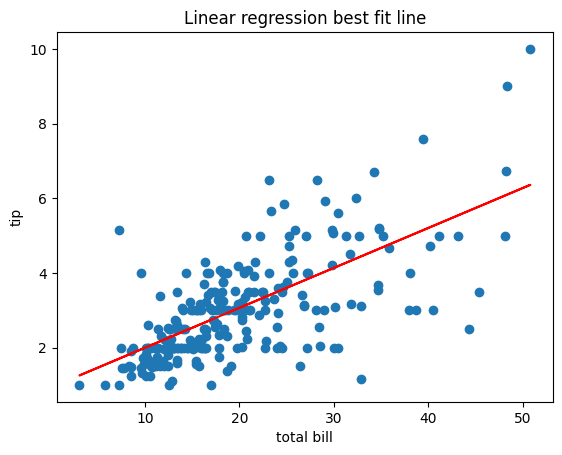

In [18]:
plt.scatter(x,y)
plt.plot(x,model.predict(scaler.transform(x)),color="red")
plt.xlabel("total bill")
plt.ylabel("tip")
plt.title("Linear regression best fit line")
plt.show()

10.Input-output Real time

In [30]:
# float(input("Enter the bill amount : "))
bill_amount=1500
bill_scaled=scaler.transform([[bill_amount]])
predict_tip=model.predict(bill_scaled)
print(f"Predicted tip : {predict_tip[0] :.2f}")

Predicted tip : 161.37


C:\Users\arthi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
